# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from api_keys import weather_api_key
from citipy import citipy
from scipy import stats

## Generate Cities List

In [2]:
longitudes = np.arange(-180,360,10)
latitudes = np.arange(-90,180,5)

cities = []
countries = []

for longitue in longitudes:
    for latitude in latitudes:
        city = (citipy.nearest_city(latitude, longitue)).city_name
        country = (citipy.nearest_city(latitude, longitue)).country_code
        if city not in cities:
            cities.append(city)
            countries.append(country.upper())
            
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
temp = []
lat = []
lon = []
Humidity = []
Cloudiness = []
wind = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try :
        response = requests.get(query_url + city).json()
        
        try:
            temp.append(response['main']['temp_max'])
        except KeyError:
            temp.append('NAN')
            
        try:
            lat.append(response['coord']['lat'])
        except KeyError:
            lat.append('NAN')
            
        try:
            lon.append(response['coord']['lon'])
        except KeyError:
            lon.append('NAN')    
            
        try:   
            Humidity.append(response['main']['humidity'])
        except KeyError:
            Humidity.append('NAN')
            
        try:
            Cloudiness.append(response['clouds']['all'])
        except KeyError:
            Cloudiness.append('NAN')
            
        try:    
            wind.append(response['wind']['speed'])
        except KeyError:
            wind.append('NAN')
         
        try:    
            date.append(response['dt'])
        except KeyError:
            date.append('NAN')        
            
    except IndexError:
        print("city not available")
        temp.append('NAN')
        lat.append('NAN')
        lon.append('NAN')
        Humidity.append('NAN')
        Cloudiness.append('NAN')
        wind.append('NAN')
        date.append('NAN')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
RawData_df = pd.DataFrame({"City":cities,
                           "Country":countries,
                           "Latitude":lat,
                           "Longitudes":lon,
                           "Max Temperature (F)":temp,
                           "Humidity (%)":Humidity,
                           "Cloudiness (%)":Cloudiness,
                           "Wind Speed (mph)":wind,
                           "Date":date})
RawData_df

,City,Country,Latitude,Longitudes,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,vaini,TO,-21.2,-175.2,73.4,78,75,5.75,1618583553
1,halalo,WF,NAN,NAN,NAN,NAN,NAN,NAN,NAN
2,vaitupu,WF,NAN,NAN,NAN,NAN,NAN,NAN,NAN
3,kapaa,US,22.0752,-159.319,66.2,88,20,5.75,1618583554
4,provideniya,RU,64.3833,-173.3,28.06,99,99,9.17,1618583554
...,...,...,...,...,...,...,...,...,...
594,russell,NZ,32.3502,-85.1999,55.4,62,90,2.59,1618583636
595,asau,TV,46.4333,26.4,52,26,92,12.19,1618583636
596,rungata,KI,NAN,NAN,NAN,NAN,NAN,NAN,NAN
597,beringovskiy,RU,63.05,179.317,28.65,91,100,11.01,1618583636


In [6]:
cleaned_df = RawData_df[RawData_df['Latitude']!="NAN"]
cleaned_df.to_csv("../output_data/cities.csv")
cleaned_df

,City,Country,Latitude,Longitudes,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,vaini,TO,-21.2,-175.2,73.4,78,75,5.75,1618583553
3,kapaa,US,22.0752,-159.319,66.2,88,20,5.75,1618583554
4,provideniya,RU,64.3833,-173.3,28.06,99,99,9.17,1618583554
5,egvekinot,RU,66.3167,-179.167,24.75,99,100,8.28,1618583554
7,alofi,NU,-19.0595,-169.919,69.8,100,98,1.14,1618583554
...,...,...,...,...,...,...,...,...,...
593,ngunguru,NZ,-35.6167,174.5,63,90,5,5.99,1618583636
594,russell,NZ,32.3502,-85.1999,55.4,62,90,2.59,1618583636
595,asau,TV,46.4333,26.4,52,26,92,12.19,1618583636
597,beringovskiy,RU,63.05,179.317,28.65,91,100,11.01,1618583636


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
Index_label = cleaned_df[cleaned_df['Humidity (%)'] > 100].index.tolist()
Index_label

[]

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

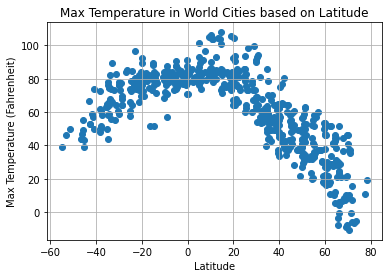

In [31]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Max Temperature (F)'], marker="o")

# Incorporate the other graph properties
plt.title('Max Temperature in World Cities based on Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/TemperatureInWorldCities.png')
plt.show()

As shown in the plot and obviously Cities closer to Latitude 0(equator) are warmer than the rest.

## Latitude vs. Humidity Plot

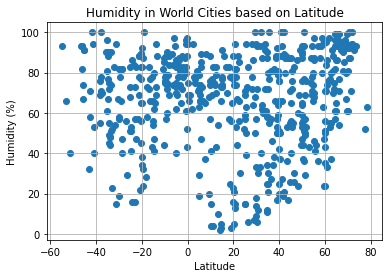

In [32]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Humidity (%)'], marker="o")

# Incorporate the other graph properties
plt.title('Humidity in World Cities based on Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/HumidityInWorldCities.png')
plt.show()

No relation found between humidity and latitude of the cities

## Latitude vs. Cloudiness Plot

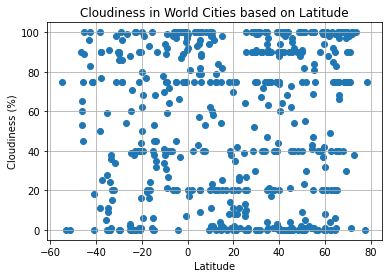

In [33]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Cloudiness (%)'], marker="o")

# Incorporate the other graph properties
plt.title('Cloudiness in World Cities based on Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/CloudinessInWorldCities.png')
plt.show()

No relation found between Cloudiness and latitude of the cities

## Latitude vs. Wind Speed Plot

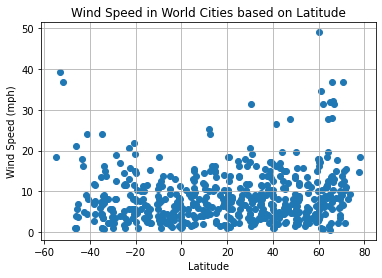

In [34]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Wind Speed (mph)'], marker="o")

# Incorporate the other graph properties
plt.title('Wind Speed in World Cities based on Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/WindSpeedInWorldCities.png')
plt.show()

No relation found between wind speed and latitude of the cities

# Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7552322576499202
y = -1.1x + 98.4


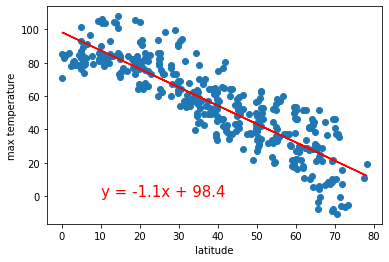

In [35]:
#Northern Hemisphere
# Create a Scatter Plot for temperature vs. latitude 
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Max Temperature (F)']
(nt_slope, nt_intercept, nt_rvalue, nt_pvalue, nt_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nt_slope + nt_intercept
line_eq = "y = " + str(round(nt_slope,2)) + "x + " + str(round(nt_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('max temperature')
print(f"The r-squared is: {nt_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49648954269213297
y = 0.63x + 86.13


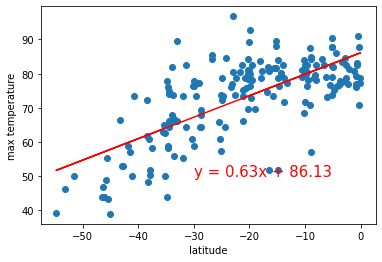

In [36]:
#Southern Hemisphere
# Create a Scatter Plot for temperature vs. latitude 
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Max Temperature (F)']
(st_slope, st_intercept, st_rvalue, st_pvalue, st_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * st_slope + st_intercept
line_eq = "y = " + str(round(st_slope,2)) + "x + " + str(round(st_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('max temperature')
print(f"The r-squared is: {st_rvalue**2}")
print(line_eq)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.057136342804483924
y = 0.3x + 52.9


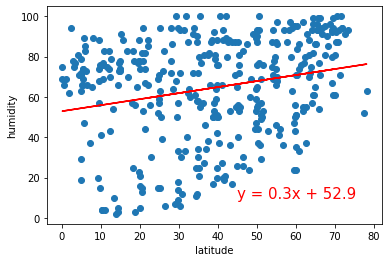

In [37]:
#Northern Hemisphere
# Create a Scatter Plot for humidity vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Humidity (%)']
(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nh_slope + nh_intercept
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {nh_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.020411370103929443
y = 0.21x + 74.05


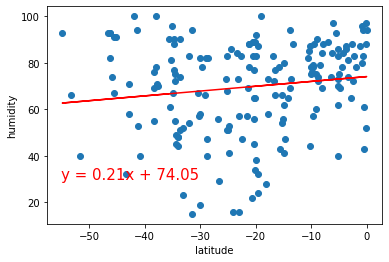

In [38]:
#Southern Hemisphere
# Create a Scatter Plot for humidity vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Humidity (%)']
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * sh_slope + sh_intercept
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {sh_rvalue**2}")
print(line_eq)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009568949439492633
y = 0.19x + 45.82


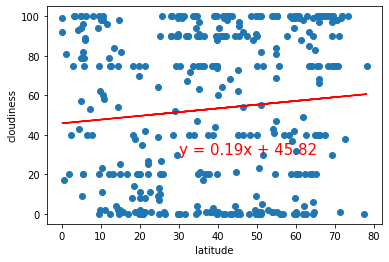

In [39]:
#Northern Hemisphere
# Create a Scatter Plot for cloudiness vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Cloudiness (%)']
(nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nc_slope + nc_intercept
line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {nc_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.047119918744310034
y = 0.57x + 64.76


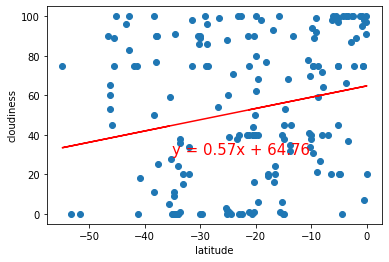

In [40]:
#Southern Hemisphere
# Create a Scatter Plot for cloudiness vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Cloudiness (%)']
(sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * sc_slope + sc_intercept
line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {sc_rvalue**2}")
print(line_eq)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02778985752855302
y = 0.05x + 7.04


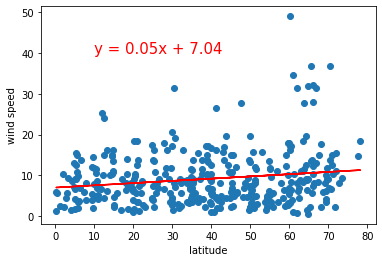

In [41]:
#Northern Hemisphere
# Create a Scatter Plot for wind speed vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Wind Speed (mph)']
(nw_slope, nw_intercept, nw_rvalue, nw_pvalue, nw_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nw_slope + nw_intercept
line_eq= "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {nw_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07072484085930382
y = -0.12x + 5.15


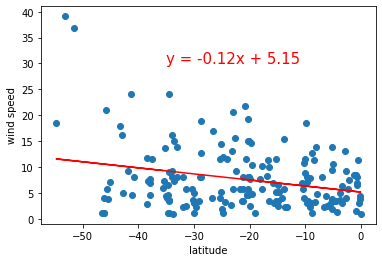

In [42]:
#Southern Hemisphere
# Create a Scatter Plot for wind speed vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Wind Speed (mph)']
(sw_slope, sw_intercept, sw_rvalue, sw_pvalue, sw_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * sw_slope + sw_intercept
line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {sw_rvalue**2}")
print(line_eq)
plt.show()